# note-2-serve-and-infer
This notebook is for serving the model.

## Flow
1. Serve the model using NVIDIA Triton
1. Setup the environment
1. Infer the model (grpc)

## Step

### 1. Serve the model using NVIDIA Triton
#### Run the Triton Server

Check your docker context

In [1]:
!docker context ls

NAME            DESCRIPTION                               DOCKER ENDPOINT                                ERROR
default         Current DOCKER_HOST based configuration   unix:///var/run/docker.sock                    
desktop-linux   Docker Desktop                            unix:///Users/jyje/.docker/run/docker.sock     
orbstack *      OrbStack                                  unix:///Users/jyje/.orbstack/run/docker.sock   


Select the context you want to use

In [2]:
!docker context use orbstack

orbstack
Current context is now "orbstack"


Run the Triton Server

In [3]:
!docker run --rm -d \
    -v $(pwd)/models:/models \
    -p 8000:8000 \
    -p 8001:8001 \
    -p 8002:8002 \
    --name pilot-triton \
    nvcr.io/nvidia/tritonserver:25.01-py3 \
    tritonserver --model-repository=/models

d6e27848cb5d5a4cd7e45c8432fc2bb6e3f481ad8d5832026e8ee1539750bd7d


Initial server logs

```
=============================
== Triton Inference Server ==
=============================

NVIDIA Release 25.01 (build 136230210)
Triton Server Version 2.54.0

Copyright (c) 2018-2024, NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This container image and its contents are governed by the NVIDIA Deep Learning Container License.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/ngc/nvidia-deep-learning-container-license

WARNING: The NVIDIA Driver was not detected.  GPU functionality will not be available.
   Use the NVIDIA Container Toolkit to start this container with GPU support; see
   https://docs.nvidia.com/datacenter/cloud-native/ .

W0202 14:22:51.301714 1 pinned_memory_manager.cc:273] "Unable to allocate pinned system memory, pinned memory pool will not be available: CUDA driver version is insufficient for CUDA runtime version"
I0202 14:22:51.301762 1 cuda_memory_manager.cc:117] "CUDA memory pool disabled"
E0202 14:22:51.301790 1 server.cc:241] "CudaDriverHelper has not been initialized."
I0202 14:22:51.303110 1 model_lifecycle.cc:473] "loading: pilot-cpu:1"
WARNING: [Torch-TensorRT] - Unable to read CUDA capable devices. Return status: 35
I0202 14:22:51.810836 1 libtorch.cc:2501] "TRITONBACKEND_Initialize: pytorch"
I0202 14:22:51.810893 1 libtorch.cc:2511] "Triton TRITONBACKEND API version: 1.19"
I0202 14:22:51.810901 1 libtorch.cc:2517] "'pytorch' TRITONBACKEND API version: 1.19"
I0202 14:22:51.810920 1 libtorch.cc:2550] "TRITONBACKEND_ModelInitialize: pilot-cpu (version 1)"
W0202 14:22:51.811364 1 libtorch.cc:329] "skipping model configuration auto-complete for 'pilot-cpu': not supported for pytorch backend"
I0202 14:22:51.811643 1 libtorch.cc:358] "Optimized execution is enabled for model instance 'pilot-cpu'"
I0202 14:22:51.811658 1 libtorch.cc:377] "Cache Cleaning is disabled for model instance 'pilot-cpu'"
I0202 14:22:51.811667 1 libtorch.cc:394] "Inference Mode is enabled for model instance 'pilot-cpu'"
I0202 14:22:51.811675 1 libtorch.cc:413] "cuDNN is enabled for model instance 'pilot-cpu'"
I0202 14:22:51.811818 1 libtorch.cc:2594] "TRITONBACKEND_ModelInstanceInitialize: pilot-cpu_0 (CPU device 0)"
I0202 14:22:51.922640 1 model_lifecycle.cc:849] "successfully loaded 'pilot-cpu'"
I0202 14:22:51.922751 1 server.cc:604] 
+------------------+------+
| Repository Agent | Path |
+------------------+------+
+------------------+------+

I0202 14:22:51.922773 1 server.cc:631] 
+---------+---------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Backend | Path                                                    | Config                                                                                                                                                        |
+---------+---------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
| pytorch | /opt/tritonserver/backends/pytorch/libtriton_pytorch.so | {"cmdline":{"auto-complete-config":"true","backend-directory":"/opt/tritonserver/backends","min-compute-capability":"6.000000","default-max-batch-size":"4"}} |
+---------+---------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+

I0202 14:22:51.922790 1 server.cc:674] 
+-----------+---------+--------+
| Model     | Version | Status |
+-----------+---------+--------+
| pilot-cpu | 1       | READY  |
+-----------+---------+--------+

I0202 14:22:51.922867 1 metrics.cc:783] "Collecting CPU metrics"
I0202 14:22:51.922920 1 tritonserver.cc:2598] 
+----------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Option                           | Value                                                                                                                                                                                                           |
+----------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| server_id                        | triton                                                                                                                                                                                                          |
| server_version                   | 2.54.0                                                                                                                                                                                                          |
| server_extensions                | classification sequence model_repository model_repository(unload_dependents) schedule_policy model_configuration system_shared_memory cuda_shared_memory binary_tensor_data parameters statistics trace logging |
| model_repository_path[0]         | /models                                                                                                                                                                                                         |
| model_control_mode               | MODE_NONE                                                                                                                                                                                                       |
| strict_model_config              | 0                                                                                                                                                                                                               |
| model_config_name                |                                                                                                                                                                                                                 |
| rate_limit                       | OFF                                                                                                                                                                                                             |
| pinned_memory_pool_byte_size     | 268435456                                                                                                                                                                                                       |
| min_supported_compute_capability | 6.0                                                                                                                                                                                                             |
| strict_readiness                 | 1                                                                                                                                                                                                               |
| exit_timeout                     | 30                                                                                                                                                                                                              |
| cache_enabled                    | 0                                                                                                                                                                                                               |
+----------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

I0202 14:22:51.923969 1 grpc_server.cc:2558] "Started GRPCInferenceService at 0.0.0.0:8001"
I0202 14:22:51.924098 1 http_server.cc:4725] "Started HTTPService at 0.0.0.0:8000"
I0202 14:22:51.967754 1 http_server.cc:358] "Started Metrics Service at 0.0.0.0:8002"
```

Check if the Triton Server is ready

> expected output: `* Connection #0 to host localhost left intact`

In [4]:
!curl -v4 http://localhost:8000/v2/health/ready 2>&1 | grep "Connection #0"

#### Clean-up the Triton Server

In [5]:
# !docker stop pilot-triton
# print("Triton Server is stopped.")

### 2. Setup the environment
#### Install the dependencies

In [6]:
!pip install --quiet --upgrade pip
!pip install --quiet -r requirements.txt

#### Import the libraries and set the environment variables

In [7]:
import ipywidgets
import matplotlib.pyplot as plt
import torch, torchvision, tritonclient.grpc

# Config
CHANNEL_SIZE = 3
RESIZE_SIZE = (224, 224)

NORMALIZE_MEAN = (0.5,0.5,0.5)
NORMALIZE_STD = (0.5,0.5,0.5)

DATA_ROOT_PATH = "./data"
MODEL_ROOT_PATH = "./models"

SERVER_HOST = "localhost:8001"
MODEL_NAME = "pilot"
DEVICE_TYPE = "cpu"
MODEL_VERSION = "1"

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(RESIZE_SIZE),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: x.repeat(CHANNEL_SIZE, 1, 1)),
        torchvision.transforms.Normalize(NORMALIZE_MEAN,NORMALIZE_STD),
    ]
)

### 3. Infer the model (grpc)

#### Load the dataset

In [8]:
dataset_test = torchvision.datasets.MNIST(root=DATA_ROOT_PATH, train=False, download=True, transform=transform)
dataloader_test = torch.utils.data.DataLoader(dataset=dataset_test, shuffle=True)

#### Show some samples of the dataset

Testing Dataset: 10000 samples


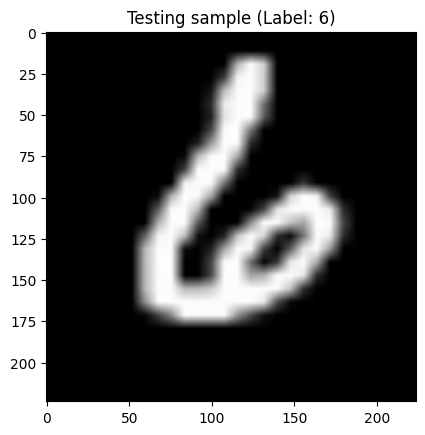

In [9]:
# Dataset Info.
print(f"Testing Dataset: {len(dataset_test)} samples")

# Visualize a sample
sample_test = next(iter(dataloader_test))

image_test = sample_test[0][0].permute(1, 2, 0) # (C, H, W) -> (H, W, C)
image_test = (image_test + 1) / 2 # Normalize Grayscale to [0, 1]

plt.imshow(image_test)
plt.title(f"Testing sample (Label: {sample_test[1][0]})")
plt.show()

#### Connect to the Triton Server

In [10]:
client = tritonclient.grpc.InferenceServerClient(
    url = SERVER_HOST,
    verbose = False,
)

# Server Status
print("- Server Status:", client.is_server_live())
print("- Server Ready Status:", client.is_server_ready())

# Model Info
print("- Model Metadata:")
print(client.get_model_metadata(f"{MODEL_NAME}-{DEVICE_TYPE}", MODEL_VERSION))
print("- Model Config:")
print(client.get_model_config(f"{MODEL_NAME}-{DEVICE_TYPE}", MODEL_VERSION))

- Server Status: True
- Server Ready Status: True
- Model Metadata:
name: "pilot-cpu"
versions: "1"
platform: "pytorch_libtorch"
inputs {
  name: "x.1"
  datatype: "FP32"
  shape: -1
  shape: 3
  shape: 224
  shape: 224
}
outputs {
  name: "4"
  datatype: "FP32"
  shape: -1
  shape: 10
}

- Model Config:
config {
  name: "pilot-cpu"
  platform: "pytorch_libtorch"
  version_policy {
    latest {
      num_versions: 1
    }
  }
  max_batch_size: 8
  input {
    name: "x.1"
    data_type: TYPE_FP32
    dims: 3
    dims: 224
    dims: 224
  }
  output {
    name: "4"
    data_type: TYPE_FP32
    dims: 10
  }
  instance_group {
    name: "pilot-cpu"
    count: 1
    kind: KIND_CPU
  }
  default_model_filename: "model.pt"
  optimization {
    input_pinned_memory {
      enable: true
    }
    output_pinned_memory {
      enable: true
    }
  }
  backend: "pytorch"
}



#### Infer the model for a random sample

/var/folders/76/04r6jkkj38z2_r2x_bs7psp80000gn/T/ipykernel_65966/2468514319.py:27: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  probabilities = torch.nn.functional.softmax(torch.from_numpy(output_data), dim=1)


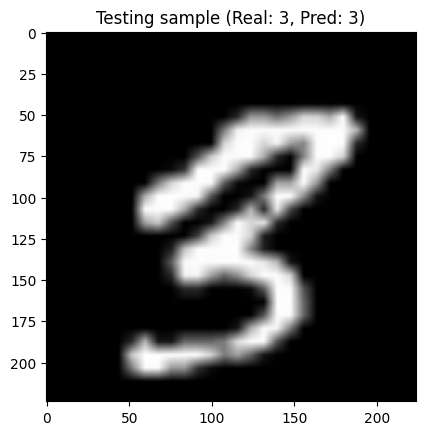

Input Image Shape: (1, 3, 224, 224)
Predicted Label: 3
Probability Distribution:
 - Number 0: 0.00%
 - Number 1: 0.01%
 - Number 2: 0.09%
 - Number 3: 99.44%
 - Number 4: 0.00%
 - Number 5: 0.22%
 - Number 6: 0.00%
 - Number 7: 0.02%
 - Number 8: 0.17%
 - Number 9: 0.03%


In [11]:
sample_test = next(iter(dataloader_test))

# Prepare the input image
image_test = sample_test[0][0]  # (C,H,W) 형태
image_data = image_test.unsqueeze(0).numpy()  # (1,C,H,W) 형태로 변환

# Set inputs
inputs = []
input_tensor = tritonclient.grpc.InferInput("x.1", image_data.shape, "FP32")
input_tensor.set_data_from_numpy(image_data)
inputs.append(input_tensor)

# Set outputs
outputs = []
outputs.append(tritonclient.grpc.InferRequestedOutput("4"))

# Do inference
response = client.infer(
    model_name=f"{MODEL_NAME}-{DEVICE_TYPE}",
    model_version=MODEL_VERSION,
    inputs=inputs,
    outputs=outputs
)

# Process the result
output_data = response.as_numpy("4")
probabilities = torch.nn.functional.softmax(torch.from_numpy(output_data), dim=1)
predicted_class = torch.argmax(probabilities).item()

image_display = sample_test[0][0].permute(1, 2, 0) # (C, H, W) -> (H, W, C)
image_display = (image_display + 1) / 2 # Normalize Grayscale to [0, 1]
plt.imshow(image_display)
plt.title(f"Testing sample (Real: {sample_test[1][0]}, Pred: {predicted_class})")
plt.show()

print(f"Input Image Shape: {image_data.shape}")
print(f"Predicted Label: {predicted_class}")
print(f"Probability Distribution:")
for idx, prob in enumerate(probabilities[0]):
    print(f" - Number {idx}: {prob.item()*100:.2f}%")

In [12]:
# Test for all images
success_max = 5
error_max = 5

image_count = 0
correct_count = 0

notebook_progress = ipywidgets.IntProgress(
    value = 0,
    min = 0,
    max = len(dataloader_test),
    description = '',
    bar_style = 'info', # 'success', 'info', 'warning', 'danger' or ''
    style = {'description_width': '250px'},
    orientation = 'horizontal',
    layout = {'width': '100%'}
)
display(notebook_progress)

successes = []
errors = []
for i, (images, labels) in enumerate(dataloader_test):
    image_data = images[0].unsqueeze(0).numpy()

    inputs = []
    input_tensor = tritonclient.grpc.InferInput("x.1", image_data.shape, "FP32")
    input_tensor.set_data_from_numpy(image_data)
    inputs.append(input_tensor)

    outputs = []
    outputs.append(tritonclient.grpc.InferRequestedOutput("4"))

    response = client.infer(
        model_name = f"{MODEL_NAME}-{DEVICE_TYPE}",
        model_version = MODEL_VERSION,
        inputs = inputs,
        outputs = outputs
    )

    output_data = response.as_numpy("4")
    probabilities = torch.nn.functional.softmax(torch.from_numpy(output_data), dim=1)
    predicted_class = torch.argmax(probabilities).item()
    
    if predicted_class == labels.item():
        correct_count += 1
        if len(successes) < success_max:
            successes.append((i, images, labels, predicted_class, probabilities))
    else:
        if len(errors) < error_max:
            errors.append((i, images, labels, predicted_class, probabilities))

    notebook_progress.value += 1
    notebook_progress.description = f"{notebook_progress.value}/{len(dataloader_test)} ({notebook_progress.value / len(dataloader_test):.2%}) [Acc: {correct_count / notebook_progress.value:.2%}]"

print(f"Accuracy: {correct_count:6d}/{len(dataloader_test)} ({correct_count / len(dataloader_test):.2%})")

IntProgress(value=0, bar_style='info', layout=Layout(width='100%'), max=10000, style=ProgressStyle(description…

Accuracy:   9811/10000 (98.11%)


Successes: 5

First 5 successes:
- Sample #0: Real: 0, Pred: 0


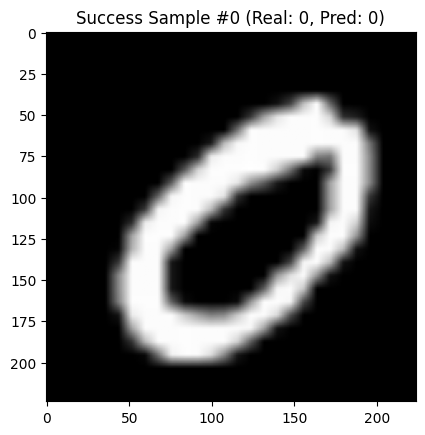

    - Probability Distribution:
      - Number 0: 98.21% (Real) (Pred)
      - Number 1: 0.01%
      - Number 2: 0.48%
      - Number 3: 0.00%
      - Number 4: 0.02%
      - Number 5: 0.02%
      - Number 6: 0.35%
      - Number 7: 0.03%
      - Number 8: 0.07%
      - Number 9: 0.80%



- Sample #1: Real: 9, Pred: 9


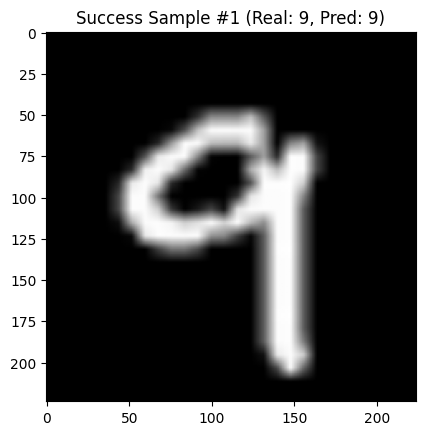

    - Probability Distribution:
      - Number 0: 0.01%
      - Number 1: 0.00%
      - Number 2: 0.02%
      - Number 3: 0.00%
      - Number 4: 0.09%
      - Number 5: 0.00%
      - Number 6: 0.02%
      - Number 7: 0.01%
      - Number 8: 0.14%
      - Number 9: 99.70% (Real) (Pred)



- Sample #2: Real: 1, Pred: 1


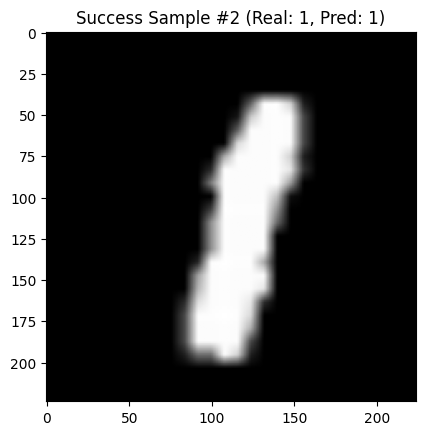

    - Probability Distribution:
      - Number 0: 0.17%
      - Number 1: 97.47% (Real) (Pred)
      - Number 2: 0.06%
      - Number 3: 0.02%
      - Number 4: 0.59%
      - Number 5: 0.03%
      - Number 6: 0.39%
      - Number 7: 0.25%
      - Number 8: 0.84%
      - Number 9: 0.18%



- Sample #3: Real: 4, Pred: 4


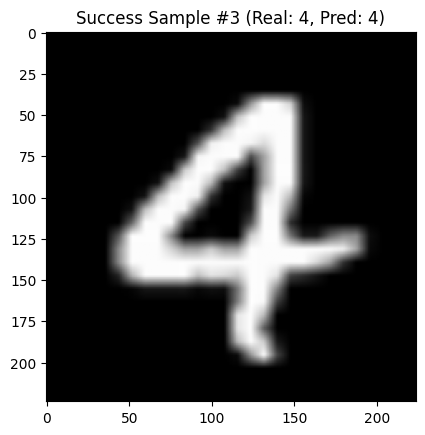

    - Probability Distribution:
      - Number 0: 0.06%
      - Number 1: 0.05%
      - Number 2: 1.18%
      - Number 3: 0.00%
      - Number 4: 89.88% (Real) (Pred)
      - Number 5: 0.01%
      - Number 6: 0.05%
      - Number 7: 0.34%
      - Number 8: 5.84%
      - Number 9: 2.60%



- Sample #4: Real: 6, Pred: 6


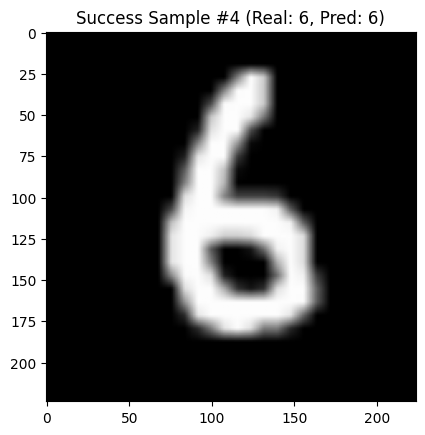

    - Probability Distribution:
      - Number 0: 0.09%
      - Number 1: 0.09%
      - Number 2: 0.27%
      - Number 3: 0.00%
      - Number 4: 0.04%
      - Number 5: 0.01%
      - Number 6: 99.04% (Real) (Pred)
      - Number 7: 0.00%
      - Number 8: 0.38%
      - Number 9: 0.07%





In [13]:
# First 5 successes
print(f"Successes: {len(successes)}")
print("\nFirst 5 successes:")
for success in successes:
    print(f"- Sample #{success[0]}: Real: {success[2].item()}, Pred: {success[3]}")
    image_display = success[1][0].permute(1, 2, 0)
    image_display = (image_display + 1) / 2
    plt.imshow(image_display)
    plt.title(f"Success Sample #{success[0]} (Real: {success[2].item()}, Pred: {success[3]})")
    plt.show()
    print(f"    - Probability Distribution:")
    for idx, prob in enumerate(success[4][0]):
        probability_string = f"{prob.item()*100:.2f}%"
        if idx == success[2].item():
            probability_string += " (Real)"
        if idx == success[3]:
            probability_string += " (Pred)"
        print(f"      - Number {idx}: {probability_string}")
    print("\n\n")

Errors: 5

First 5 errors:
- Sample #152: Real: 3, Pred: 8


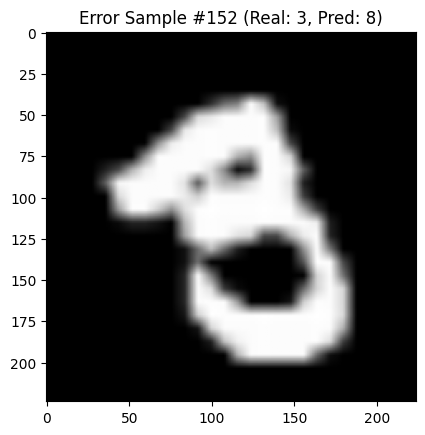

    - Probability Distribution:
      - Number 0: 0.78%
      - Number 1: 0.10%
      - Number 2: 0.46%
      - Number 3: 3.89% (Real)
      - Number 4: 1.16%
      - Number 5: 1.14%
      - Number 6: 0.82%
      - Number 7: 0.06%
      - Number 8: 47.28% (Pred)
      - Number 9: 44.29%



- Sample #225: Real: 6, Pred: 0


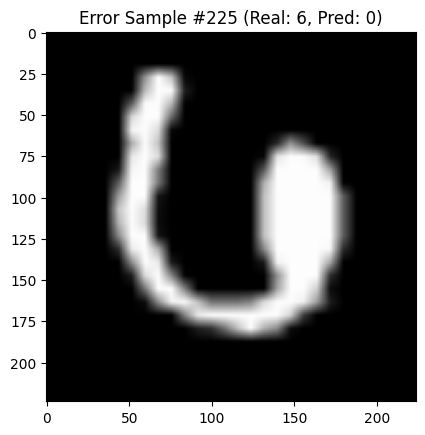

    - Probability Distribution:
      - Number 0: 56.80% (Pred)
      - Number 1: 4.99%
      - Number 2: 1.08%
      - Number 3: 0.11%
      - Number 4: 2.94%
      - Number 5: 0.68%
      - Number 6: 25.38% (Real)
      - Number 7: 0.12%
      - Number 8: 1.62%
      - Number 9: 6.29%



- Sample #237: Real: 1, Pred: 6


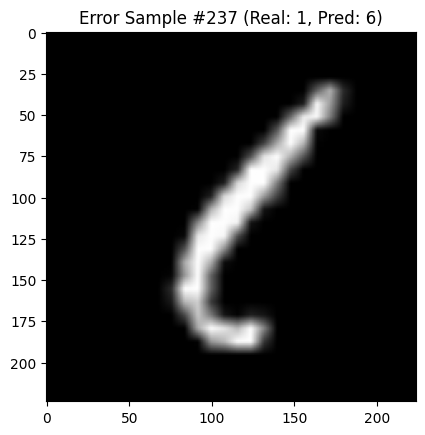

    - Probability Distribution:
      - Number 0: 0.91%
      - Number 1: 9.24% (Real)
      - Number 2: 4.94%
      - Number 3: 0.00%
      - Number 4: 1.07%
      - Number 5: 0.18%
      - Number 6: 81.87% (Pred)
      - Number 7: 0.05%
      - Number 8: 0.61%
      - Number 9: 1.12%



- Sample #238: Real: 4, Pred: 9


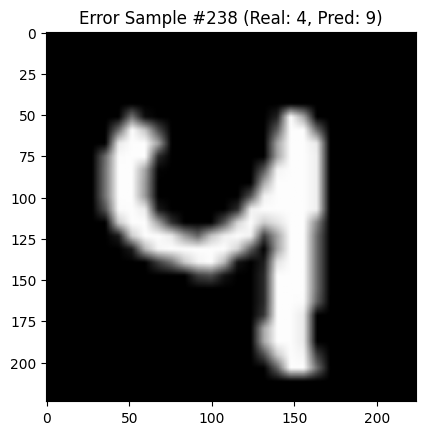

    - Probability Distribution:
      - Number 0: 0.15%
      - Number 1: 8.16%
      - Number 2: 0.18%
      - Number 3: 0.05%
      - Number 4: 43.91% (Real)
      - Number 5: 0.32%
      - Number 6: 0.50%
      - Number 7: 1.52%
      - Number 8: 0.93%
      - Number 9: 44.29% (Pred)



- Sample #267: Real: 3, Pred: 8


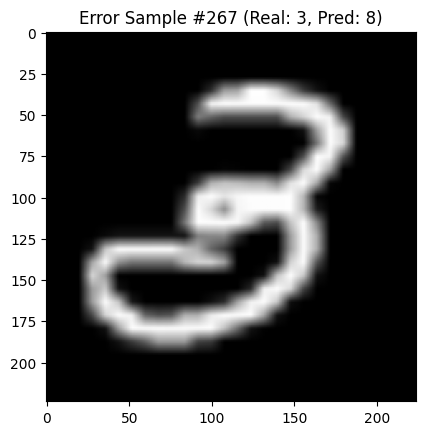

    - Probability Distribution:
      - Number 0: 0.51%
      - Number 1: 0.32%
      - Number 2: 3.06%
      - Number 3: 45.05% (Real)
      - Number 4: 0.21%
      - Number 5: 1.13%
      - Number 6: 0.74%
      - Number 7: 0.50%
      - Number 8: 45.82% (Pred)
      - Number 9: 2.65%





In [14]:
# First 5 errors
print(f"Errors: {len(errors)}")
print("\nFirst 5 errors:")
for error in errors:
    print(f"- Sample #{error[0]}: Real: {error[2].item()}, Pred: {error[3]}")
    image_display = error[1][0].permute(1, 2, 0)
    image_display = (image_display + 1) / 2
    plt.imshow(image_display)
    plt.title(f"Error Sample #{error[0]} (Real: {error[2].item()}, Pred: {error[3]})")
    plt.show()
    print(f"    - Probability Distribution:")
    for idx, prob in enumerate(error[4][0]):
        probability_string = f"{prob.item()*100:.2f}%"
        if idx == error[2].item():
            probability_string += " (Real)"
        if idx == error[3]:
            probability_string += " (Pred)"
        print(f"      - Number {idx}: {probability_string}")
    print("\n\n")